In [2]:
import io
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('merged_site_summaries.csv')
df.head()

,Unnamed: 0,n_vulns,vulns,total_cvss,max_cvss,site,Domain Name,Domain Type,Agency,Organization,City,State,Security Contact Email
0,0,0,set(),0.0,0.0,18F.GOV,18F.GOV,Federal Agency - Executive,General Services Administration,18F,Washington,DC,tts-vulnerability-reports@gsa.gov
1,1,0,set(),0.0,0.0,2020CENSUS.GOV,2020CENSUS.GOV,Federal Agency - Executive,Department of Commerce,U.S. Census Bureau,Suitland,MD,(blank)
2,2,5,"{'CVE-2010-3972', 'CVE-2012-2531', 'CVE-2010-1...",34.2,10.0,29PALMSBOMI-NSN.GOV,29PALMSBOMI-NSN.GOV,Native Sovereign Nation,Indian Affairs,Twenty-Nine Palms Band of Mission Indians,Coachella,CA,(blank)
3,3,0,set(),0.0,0.0,29PALMSGAMING-NSN.GOV,29PALMSGAMING-NSN.GOV,Native Sovereign Nation,Indian Affairs,Twenty-Nine Palms Band of Mission Indians,Coachella,CA,(blank)
4,4,0,set(),0.0,0.0,511WI.GOV,511WI.GOV,State/Local Govt,Non-Federal Agency,Wisconsin Department of Transportation,Madison,WI,(blank)


In [4]:
domain_types = df['Domain Type'].unique()
domain_types

array(['Federal Agency - Executive', 'Native Sovereign Nation',
       'State/Local Govt', 'City', 'County',
       'Federal Agency - Legislative', 'Independent Intrastate Agency',
       'Interstate Agency', 'Federal Agency - Judicial', nan], dtype=object)

In [5]:
d_rows = df.loc[np.isnan(df['Domain Type'])]
d_rows


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

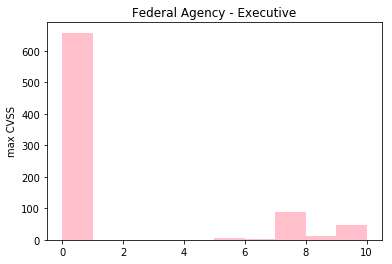

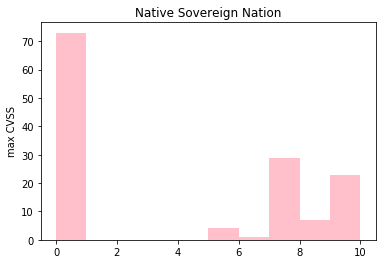

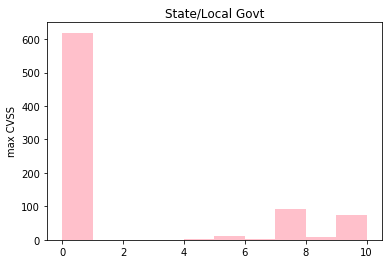

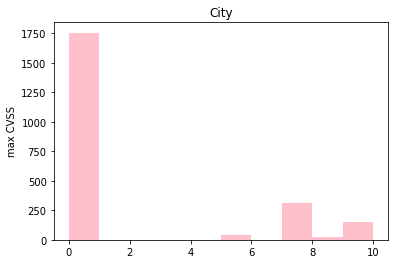

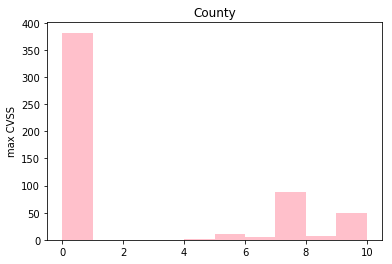

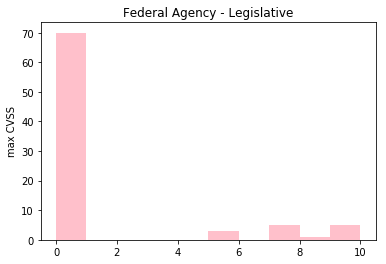

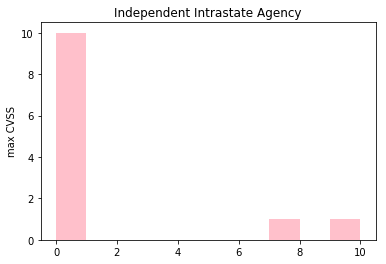

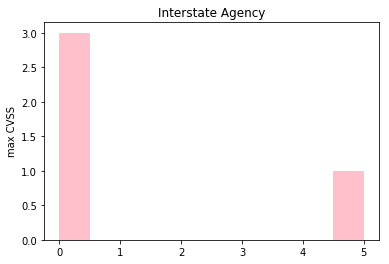

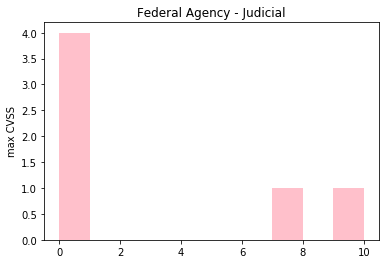

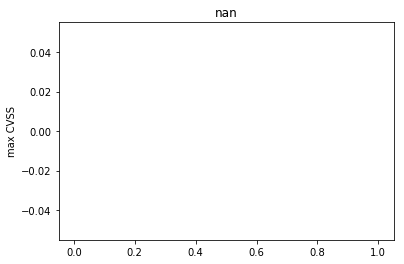

In [6]:
for d in domain_types:
    d_rows = df.loc[df['Domain Type'] == d]
    plt.hist(d_rows['max_cvss'], color='pink')
    plt.ylabel('max CVSS')
    plt.title(d)
    plt.show()

In [29]:
#find the means for each category
mean_total = {}
mean_max = {}
mean_vulns = {}
pro_vulns = {}
n_type = {}

for d in domain_types:
    d_rows = df.loc[df['Domain Type'] == d]
    n_type[d] = len(d_rows)
    v = np.mean(d_rows['total_cvss'])
    m = np.mean(d_rows['max_cvss'])
    n_vulns = np.mean(d_rows['n_vulns'])
    if(len(d_rows > 0)):
        p_vulns = len(d_rows.loc[d_rows['n_vulns'] > 0]) / len(d_rows)
    else:
        p_vulns = 0
    if(math.isnan(v)):
        v = 0
        m = 0
        n_vulns = 0
    mean_total[d] = v
    mean_max[d] = m
    mean_vulns[d] = n_vulns
    pro_vulns[d] = p_vulns

#print(mean_total.values())

d_no_nan = []
for d in domain_types:
    if(pd.isnull(d)):
        d_no_nan.append('nan')
    else:
        d_no_nan.append(d)

#print(d_no_nan)
#print(mean_total.values())


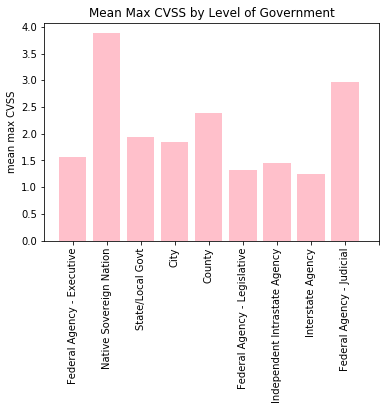

In [8]:
x = range(len(d_no_nan))
plt.bar(x[:-1], list(mean_max.values())[:-1], color='pink')
plt.xticks(x, d_no_nan[:-1], rotation=90)
plt.ylabel('mean max CVSS')
plt.title('Mean Max CVSS by Level of Government')
plt.show()

In [61]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, size=8)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
#add_value_labels(ax)

In [65]:
1 - len(df.loc[df['n_vulns'] > 0]) / len(df)


0.7857142857142857

In [37]:
short_labels = ['Executive Agency', 'Native Nation', 'State/Local', 'City', 'County', 'Legislative (federal)', 'Ind. Intrastate', 'Intrastate', 'Judicial (federal)']

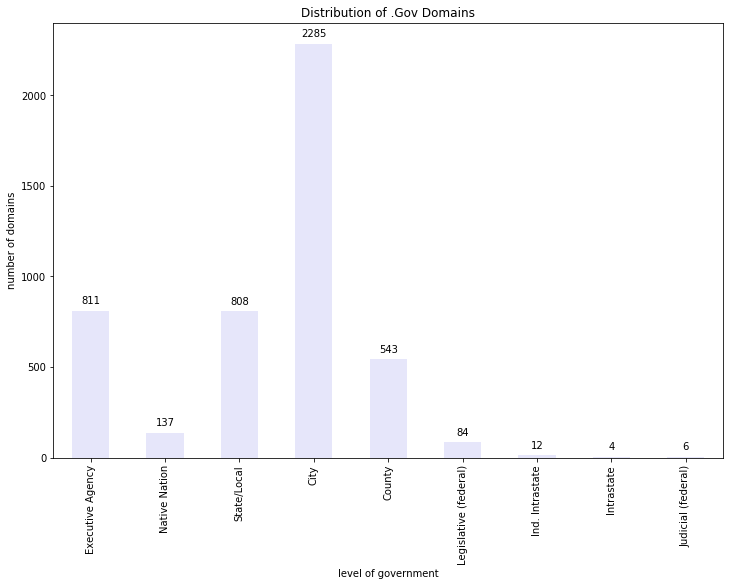

In [38]:
plt.figure(figsize=(12, 8))
ax = (pd.Series.from_array(list(n_type.values())[:-1])).plot(kind='bar', color='lavender')
ax.set_title('Distribution of .Gov Domains')
ax.set_xlabel('level of government')
ax.set_ylabel('number of domains')
ax.set_xticklabels(short_labels)
add_value_labels(ax)
plt.savefig("domain_distr.png")
plt.show()


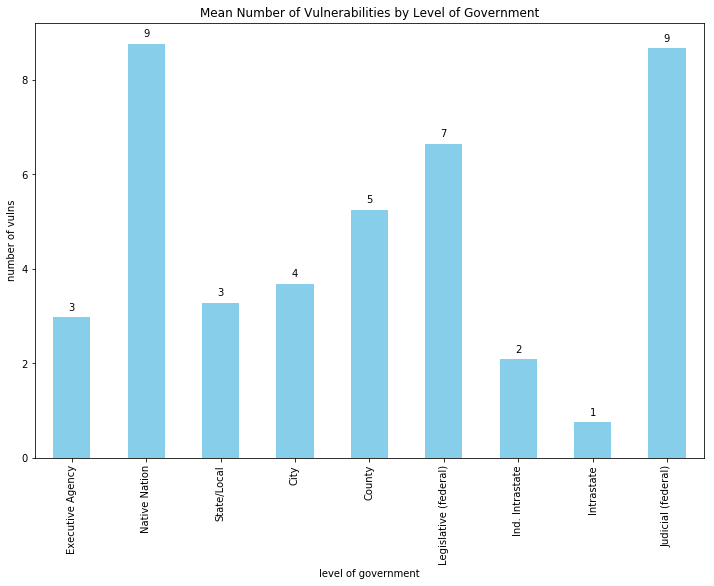

In [39]:
plt.figure(figsize=(12, 8))
ax = (pd.Series.from_array(list(mean_vulns.values())[:-1])).plot(kind='bar', color='skyblue')
ax.set_title('Mean Number of Vulnerabilities by Level of Government')
ax.set_xlabel('level of government')
ax.set_ylabel('number of vulns')
ax.set_xticklabels(short_labels)
add_value_labels(ax)
plt.savefig("mean_by_level.png")
plt.show()


{'Federal Agency - Executive': 0.18988902589395806,
 'Native Sovereign Nation': 0.46715328467153283,
 'State/Local Govt': 0.23391089108910892,
 'City': 0.23194748358862144,
 'County': 0.2965009208103131,
 'Federal Agency - Legislative': 0.16666666666666666,
 'Independent Intrastate Agency': 0.16666666666666666,
 'Interstate Agency': 0.25,
 'Federal Agency - Judicial': 0.3333333333333333,
 nan: 0}

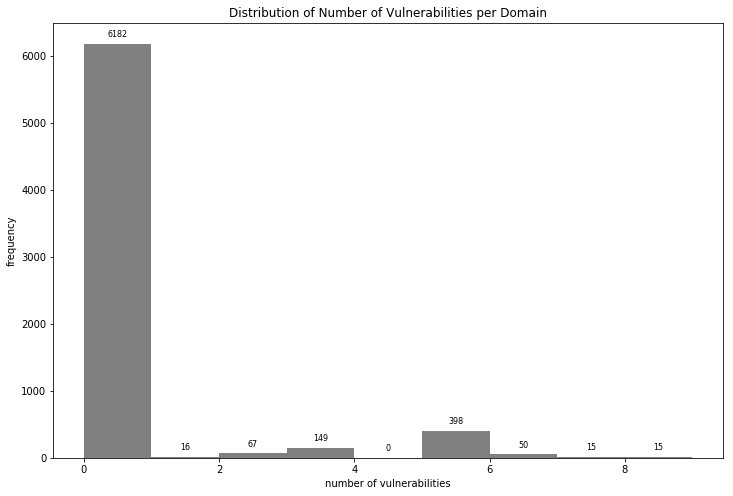

In [66]:
#a zoomed in histogram for just 1 through 10 vulnerabilities
df_l10 = df.loc[df['n_vulns'] < 10]
binwidth = 1

plt.figure(figsize=(12, 8))
ax = (df_l10['n_vulns']).plot(kind='hist', color='gray', bins=range(min(df_l10['n_vulns']), max(df_l10['n_vulns']) + binwidth, binwidth))
ax.set_title('Distribution of Number of Vulnerabilities per Domain')
ax.set_xlabel('number of vulnerabilities')
ax.set_ylabel('frequency')
#ax.set_xticklabels(short_labels)
add_value_labels(ax)
#plt.savefig("mean_by_level.png")
plt.show()



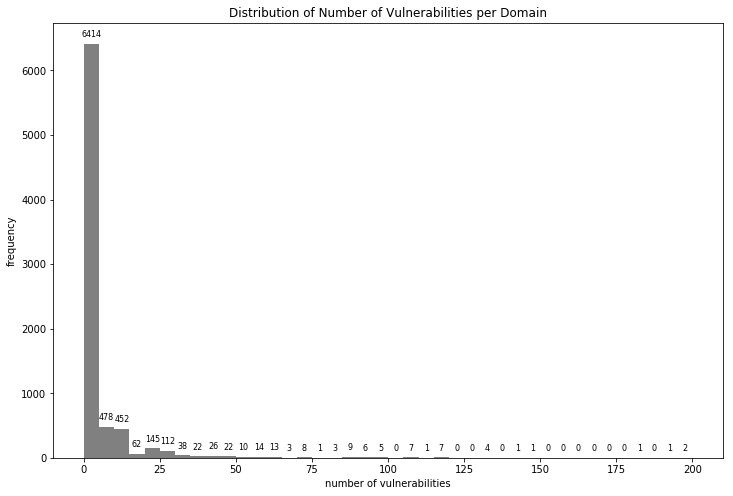

In [62]:
binwidth = 5

plt.figure(figsize=(12, 8))
ax = (df['n_vulns']).plot(kind='hist', color='gray', bins=range(min(df['n_vulns']), max(df['n_vulns']) + binwidth, binwidth))
ax.set_title('Distribution of Number of Vulnerabilities per Domain')
ax.set_xlabel('number of vulnerabilities')
ax.set_ylabel('frequency')
#ax.set_xticklabels(short_labels)
add_value_labels(ax)
#plt.savefig("mean_by_level.png")
plt.show()


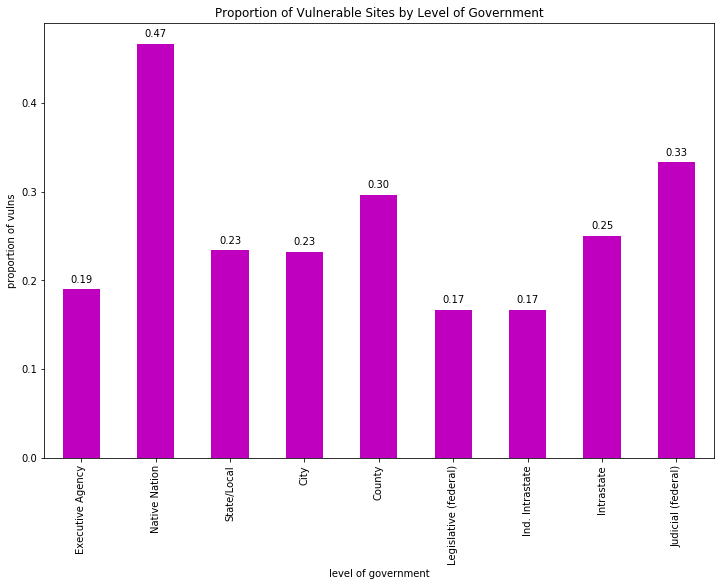

In [46]:
plt.figure(figsize=(12, 8))
ax = (pd.Series.from_array(list(pro_vulns.values())[:-1])).plot(kind='bar', color='m')
ax.set_title('Proportion of Vulnerable Sites by Level of Government')
ax.set_xlabel('level of government')
ax.set_ylabel('proportion of vulns')
ax.set_xticklabels(short_labels)
add_value_labels(ax)
#plt.savefig("mean_by_level.png")
plt.show()

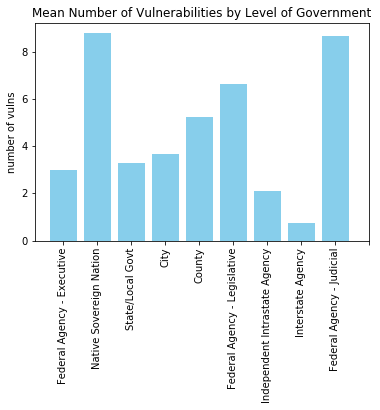

In [15]:
#fig, ax = plt.subplots()    
x = range(len(d_no_nan))
plt.bar(x[:-1], list(mean_vulns.values())[:-1], color='skyblue')
plt.xticks(x, d_no_nan[:-1], rotation=90)
plt.ylabel('number of vulns')
plt.title('Mean Number of Vulnerabilities by Level of Government')

plt.show()

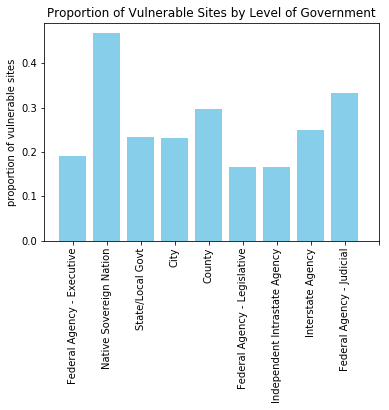

In [10]:
x = range(len(d_no_nan))
plt.bar(x[:-1], list(pro_vulns.values())[:-1], color='skyblue')
plt.xticks(x, d_no_nan[:-1], rotation=90)
plt.ylabel('proportion of vulnerable sites')
plt.title('Proportion of Vulnerable Sites by Level of Government')
plt.show()